In [79]:
import pandas as pd
from SQL import create_db_connection, execute_query
import matplotlib.pyplot as plt
import h5py
import datetime
import numpy as np
from dateutil import parser
import matplotlib.ticker as ticker
import math

In [7]:
#plotting preferences
plt.rcParams['font.size'] = '16'

In [8]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

In [9]:
#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

MySQL Database connection successful


In [10]:
df = pd.read_fwf("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/flight.rpt")
times = np.array('2021-08-30 ' + df['TIME'])
dt = []
for d in range(len(times)):
    v = parser.parse(times[d])
    dt.append(v)

df['datetime'] = dt
df[100:102]

,TIME,BAR ALT,MBS,AIRT,DRAD,LAT,LON,GPS ALT,datetime
100,17:08:34,96320.0,12.80,-30.5,24.1,34-26.9,-104-17.9,29112.0,2021-08-30 17:08:34
101,17:09:34,96856.0,12.49,-26.6,26.5,34-26.8,-104-18.5,29268.0,2021-08-30 17:09:34


In [11]:
df_ircsp = pd.read_csv("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/telemetry.csv")
df_time = pd.read_csv("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/tele_time.csv",header = None)

,0
0,0.216667
1,0.433333
2,0.683333
3,0.983333
4,1.283333
...,...
2086,511.516667
2087,511.716667
2088,511.916667
2089,512.100000


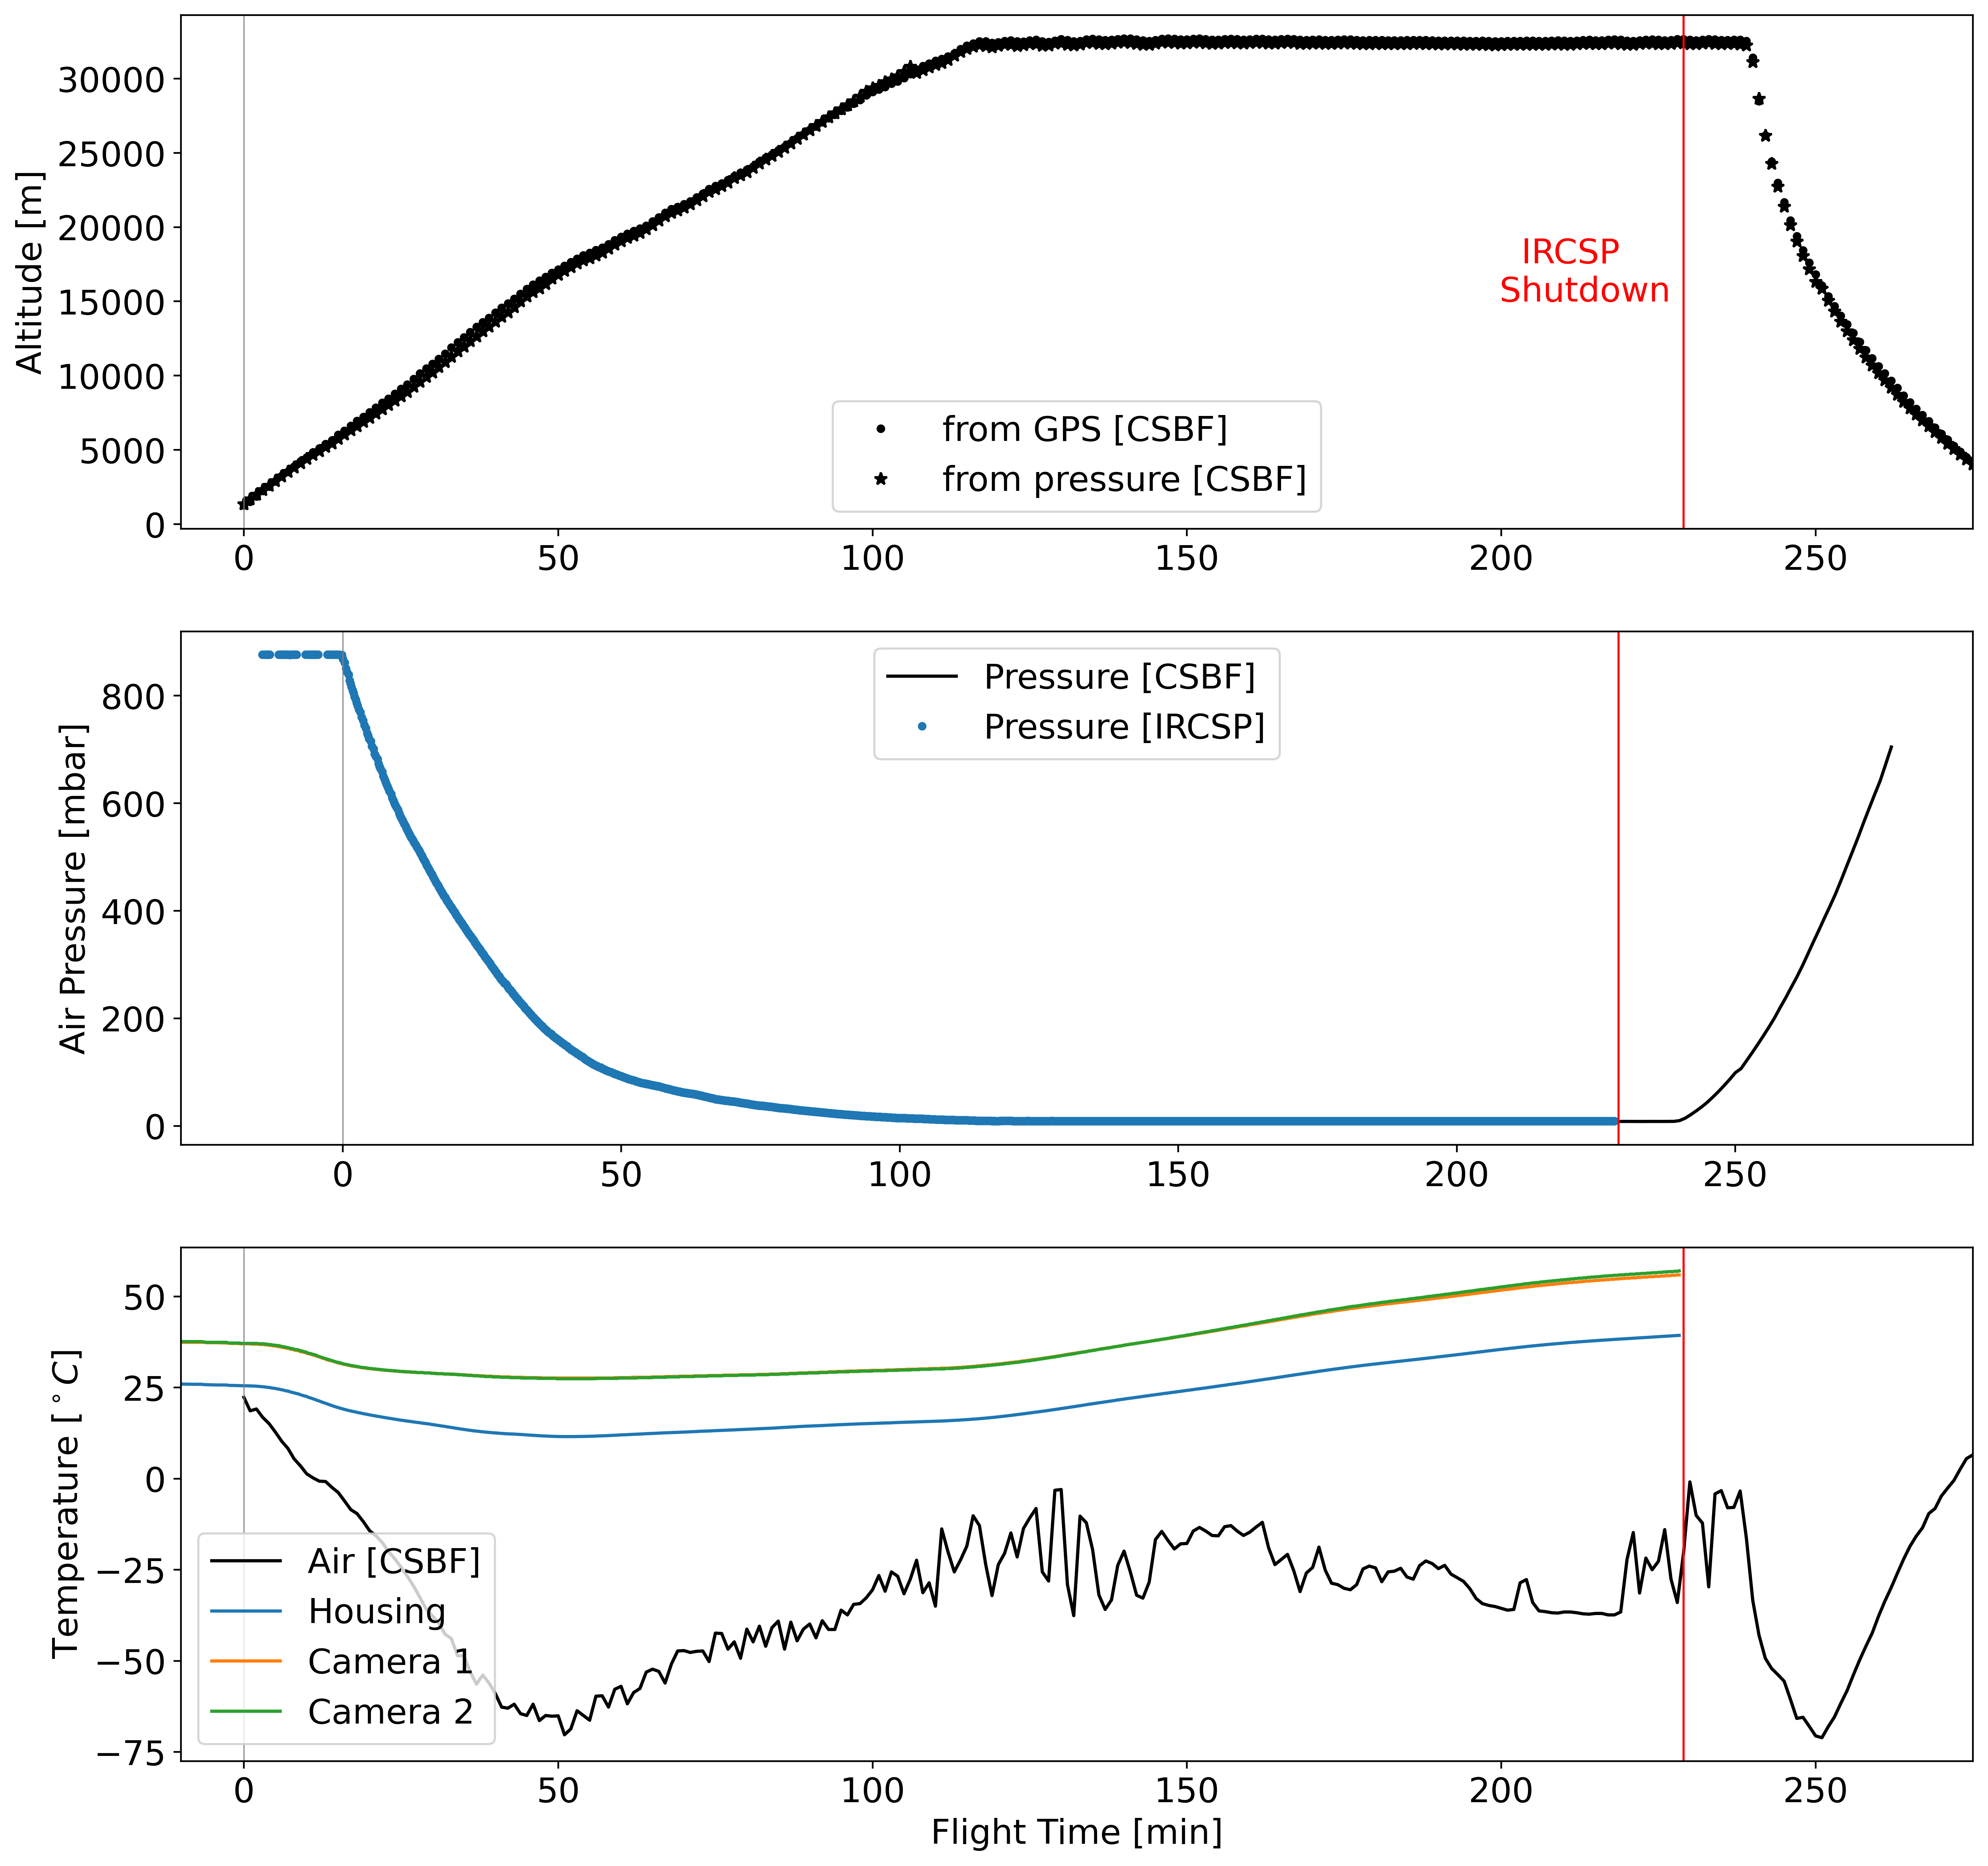

In [16]:
fig, ax = plt.subplots(3, 1,  figsize=(15, 15), dpi=500)

ax[0].plot(df['GPS ALT'],'k.',label = "from GPS [CSBF]")
ax[0].plot(df['BAR ALT']/ 3.281,'k *',label = "from pressure [CSBF]" )
ax[0].set_ylabel('Altitude [m]')
#ax[0].set_xlabel('Flight Time [min]')
ax[0].axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
#ax.axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax[0].axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
ax[0].legend()
ax[0].text(198, 15000, '   IRCSP \n Shutdown',color = 'red')
ax[0].set_xlim([-10,275])


start = 850;
offset = 284;

ax[1].plot(df['MBS'],'k',label = "Pressure [CSBF]")
ax[1].plot(df_time[0][start:]-offset,df_ircsp['pressure'][start:],'.',label = "Pressure [IRCSP]")
ax[1].set_ylabel('Air Pressure [mbar]')
#ax[1].set_xlabel('Flight Time [min]')
ax[1].axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
#ax[1].axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax[1].axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
ax[1].legend()
plt.xlim([-10,275])

ax[2].plot(df['AIRT'],'k',label = "Air [CSBF]")
ax[2].plot(df_time[0][start:]-offset,df_ircsp['t_ircsp'][start:],label = "Housing")
ax[2].plot(df_time[0][start:]-offset,df_ircsp['cam1_t'][start:],label = "Camera 1")
ax[2].plot(df_time[0][start:]-offset,df_ircsp['cam2_t'][start:],label = "Camera 2")
ax[2].set_ylabel('Temperature [$^\circ C$]')
ax[2].set_xlabel('Flight Time [min]')
ax[2].axvline(0,color='gray', linewidth=0.5)#,label = "Launch")
#ax[2].set_axvline(110,linestyle = '--',color='red', linewidth=1)#,label = "Est. Heatsink Loss")
ax[2].axvline(229,color='red', linewidth=1)#,label = "IRCSP Shutdown")
plt.legend()
plt.xlim([-10,275])
plt.show()

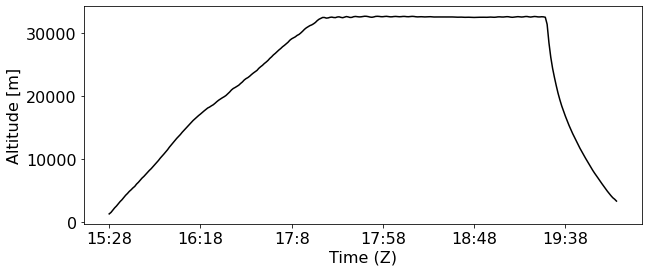

In [42]:
fig, ax = plt.subplots(1,1,figsize = (10,4))
plt.plot(time_CSBF,df['GPS ALT'],'k',label = "from GPS [CSBF]")
plt.ylabel('Altitude [m]')
plt.xlabel('Time (Z)')
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

In [28]:
time_CSBF = []
for i in range(len(df)):
    tt = "%s:%s" % (df['datetime'].loc[i].hour, df['datetime'].loc[i].minute)
    time_CSBF.append(tt)

In [53]:
launchi = 895
start = 283

In [77]:
time_delta  = np.array(df_time - df_time.loc[895])
t0 = df['datetime'].loc[0]
time_delta

array([[-283.65      ],
       [-283.43333333],
       [-283.18333333],
       ...,
       [ 228.05      ],
       [ 228.23333333],
       [ 228.43333333]])

In [89]:
measurement_times = []
for i in range(len(time_delta)):
    t = t0 + np.sign(time_delta[i][0])*pd.to_timedelta(np.abs(np.round(time_delta[i][0])), unit='m')+ np.sign(time_delta[i][0])*pd.to_timedelta(math.modf(time_delta[i][0])[1], unit='s')
    measurement_times.append(t)

measurement_times

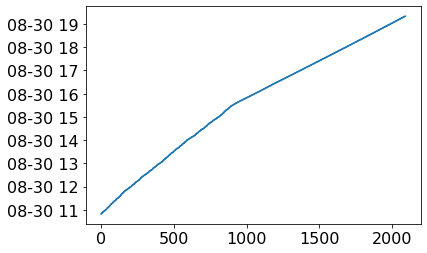

In [92]:
plt.plot(measurement_times)